# Participantes Victor Armando Jaramillo Moreno

In [200]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

In [201]:
movies = pd.read_csv('Peliculas_descripcion.txt',sep='|',header=None)
movies[1][7]

'Babe (1995)'

In [202]:
df = pd.read_csv('Peliculas_Clientes_Evaluaciones.txt',sep="\t",header=None)
column_names = ["c1", "c2", "c3","c4"]
df.columns = column_names 
df["c3"] = df["c3"] - 3
matriz_evaluaciones = df.pivot(index='c2', columns='c1', values='c3')
matriz_evaluaciones

c1,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
c2,,,,,,,,,,,,,,,,,,,,,
1,2.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,...,-1.0,0.0,1.0,NaN,1.0,NaN,NaN,2.0,NaN,NaN
2,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN
5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
top_peliculas = matriz_evaluaciones.isna().sum(axis=1).nsmallest(50).index
print(top_peliculas.values)
top_clientes = matriz_evaluaciones.isna().sum(axis=0).nsmallest(100).index

matriz_filtrada = matriz_evaluaciones.loc[top_peliculas,top_clientes]

[ 50 258 100 181 294 286 288   1 300 121 174 127  56   7  98 237 117 172
 222 204 313 405  79 210 151 173  69 168 748 269 257 195 423   9 276 318
  22 302  96 328  15  25 118 183 216 176  64 202 234  28]


In [204]:
from scipy.spatial import distance_matrix
matriz_filtrada = matriz_filtrada.fillna(0)

dist_matrix = cosine_distances(matriz_filtrada)
#np.fill_diagonal(dist_matrix,0)
df_matrix = pd.DataFrame(dist_matrix)
df_matrix

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,0.426712,0.373061,0.123668,0.839693,0.663280,0.669586,0.397041,0.836575,0.627990,...,0.610208,0.807897,0.968373,0.324988,0.408004,0.391015,0.252060,0.383632,0.363734,0.343858
1,0.426712,0.000000,0.501455,0.465617,0.849346,0.593740,0.696830,0.520523,0.702956,0.632461,...,0.634684,0.788484,0.849101,0.463226,0.520523,0.511662,0.395265,0.546167,0.630567,0.478232
2,0.373061,0.501455,0.000000,0.439246,0.976109,0.587582,0.715278,0.478808,0.838402,0.821355,...,0.741353,0.733524,0.922229,0.363846,0.538715,0.457482,0.360671,0.544674,0.459149,0.453357
3,0.123668,0.465617,0.439246,0.000000,0.701236,0.748363,0.672480,0.345022,0.817669,0.557599,...,0.600449,0.748991,0.851801,0.409798,0.441343,0.406494,0.300028,0.378229,0.402524,0.376260
4,0.839693,0.849346,0.976109,0.701236,0.000000,0.890859,0.844709,0.649633,0.897589,0.904632,...,0.803716,0.986110,0.940543,0.880457,0.907256,0.759482,0.701499,0.678126,0.952534,0.797784
5,0.663280,0.593740,0.587582,0.748363,0.890859,0.000000,0.790619,0.663380,0.778530,0.839592,...,0.697654,0.800798,0.952629,0.611698,0.646959,0.655069,0.549384,0.760649,0.705019,0.742220
6,0.669586,0.696830,0.715278,0.672480,0.844709,0.790619,0.000000,0.649543,0.783118,0.796714,...,0.748960,0.806199,0.987038,0.711325,0.667516,0.588917,0.609552,0.578979,0.610919,0.603243
7,0.397041,0.520523,0.478808,0.345022,0.649633,0.663380,0.649543,0.000000,0.735865,0.577525,...,0.616094,0.738774,0.955273,0.515777,0.542636,0.522341,0.332260,0.451167,0.571516,0.437161
8,0.836575,0.702956,0.838402,0.817669,0.897589,0.778530,0.783118,0.735865,0.000000,0.569955,...,0.804344,0.910991,0.793625,0.823223,0.746870,0.845876,0.781874,0.828119,0.929028,0.654453
9,0.627990,0.632461,0.821355,0.557599,0.904632,0.839592,0.796714,0.577525,0.569955,0.000000,...,0.635601,0.860320,0.597568,0.687021,0.609410,0.657668,0.598960,0.593329,0.750324,0.538555


In [205]:
labels = np.array(movies[1][top_peliculas.values-1].values)
print(labels)

['Star Wars (1977)' 'Contact (1997)' 'Fargo (1996)'
 'Return of the Jedi (1983)' 'Liar Liar (1997)'
 'English Patient, The (1996)' 'Scream (1996)' 'Toy Story (1995)'
 'Air Force One (1997)' 'Independence Day (ID4) (1996)'
 'Raiders of the Lost Ark (1981)' 'Godfather, The (1972)'
 'Pulp Fiction (1994)' 'Twelve Monkeys (1995)'
 'Silence of the Lambs, The (1991)' 'Jerry Maguire (1996)'
 'Rock, The (1996)' 'Empire Strikes Back, The (1980)'
 'Star Trek: First Contact (1996)' 'Back to the Future (1985)'
 'Titanic (1997)' 'Mission: Impossible (1996)' 'Fugitive, The (1993)'
 'Indiana Jones and the Last Crusade (1989)'
 'Willy Wonka and the Chocolate Factory (1971)'
 'Princess Bride, The (1987)' 'Forrest Gump (1994)'
 'Monty Python and the Holy Grail (1974)' 'Saint, The (1997)'
 'Full Monty, The (1997)' 'Men in Black (1997)' 'Terminator, The (1984)'
 'E.T. the Extra-Terrestrial (1982)' 'Dead Man Walking (1995)'
 'Leaving Las Vegas (1995)' "Schindler's List (1993)" 'Braveheart (1995)'
 'L.A. Con

C:\Users\victor\AppData\Local\Temp\ipykernel_16032\493414640.py:4: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(df_matrix,method='ward')


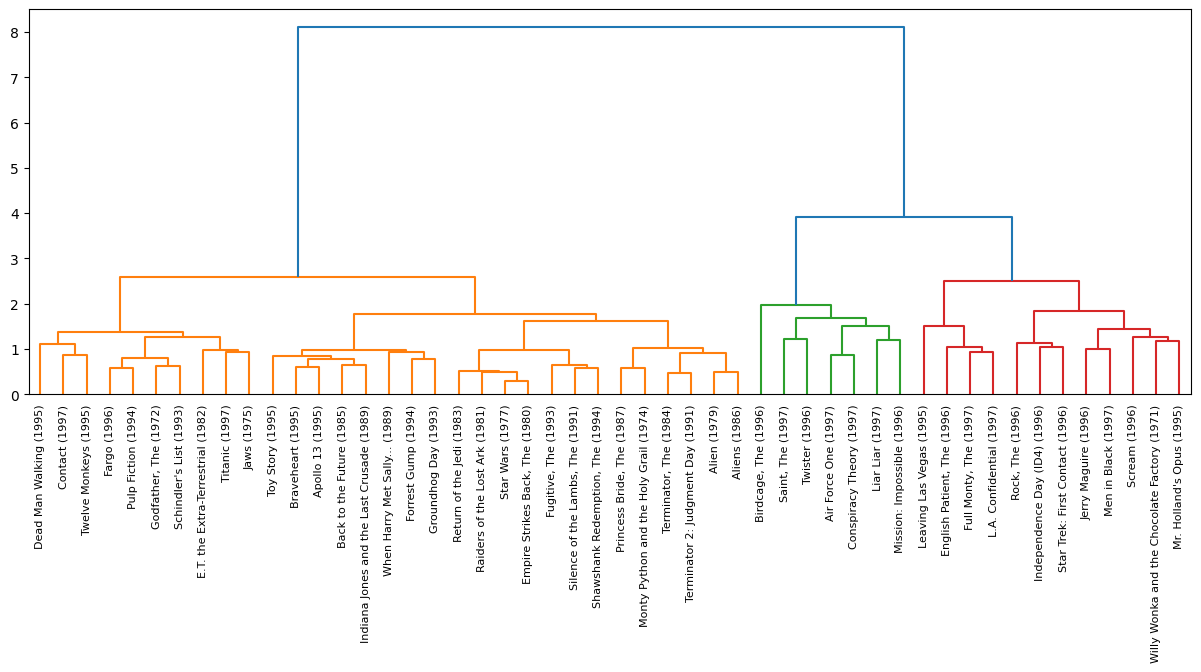

In [206]:
from scipy.spatial.distance import squareform

plt.figure(figsize=(15,5))
Z = hierarchy.linkage(df_matrix,method='ward')
dn = hierarchy.dendrogram(Z, color_threshold=3,labels=labels)
plt.show()

In [207]:
print("TOP 50 MOVIES:")
for idx,movie in enumerate(labels):
  print(idx, movie)

TOP 50 MOVIES:
0 Star Wars (1977)
1 Contact (1997)
2 Fargo (1996)
3 Return of the Jedi (1983)
4 Liar Liar (1997)
5 English Patient, The (1996)
6 Scream (1996)
7 Toy Story (1995)
8 Air Force One (1997)
9 Independence Day (ID4) (1996)
10 Raiders of the Lost Ark (1981)
11 Godfather, The (1972)
12 Pulp Fiction (1994)
13 Twelve Monkeys (1995)
14 Silence of the Lambs, The (1991)
15 Jerry Maguire (1996)
16 Rock, The (1996)
17 Empire Strikes Back, The (1980)
18 Star Trek: First Contact (1996)
19 Back to the Future (1985)
20 Titanic (1997)
21 Mission: Impossible (1996)
22 Fugitive, The (1993)
23 Indiana Jones and the Last Crusade (1989)
24 Willy Wonka and the Chocolate Factory (1971)
25 Princess Bride, The (1987)
26 Forrest Gump (1994)
27 Monty Python and the Holy Grail (1974)
28 Saint, The (1997)
29 Full Monty, The (1997)
30 Men in Black (1997)
31 Terminator, The (1984)
32 E.T. the Extra-Terrestrial (1982)
33 Dead Man Walking (1995)
34 Leaving Las Vegas (1995)
35 Schindler's List (1993)
36 Bra

In [208]:
a = int(input("Enter a movie id and I will recommend you 3 movies"))
print("movie = ",labels[a])
smallest_elements = np.argpartition(dist_matrix[a],4)[:4]

print("Recommendations:")
for _ in smallest_elements:
  if _ != a:
    print("\t",labels[_])


movie =  Star Wars (1977)
Recommendations:
	 Empire Strikes Back, The (1980)
	 Return of the Jedi (1983)
	 Raiders of the Lost Ark (1981)
